# Pandas Data Analysis with Large Datasets

## Task 1: Sorting and Filtering Data

In [22]:
import pandas as pd
import matplotlib

# Load Titanic dataset (1000 rows)
df = pd.read_csv("./titanic.csv")
df.head()

,PassengerId,Name,Sex,Age,Fare,Embarked
0,1,Mark Gray,male,63,328.98,Q
1,2,Cameron Powell,female,17,140.26,C
2,3,Martha Schneider,male,73,475.68,C
3,4,Eric Jones,male,33,79.77,S
4,5,Shannon Robinson,male,84,219.01,S


In [23]:
# Sort dataset by Age descending
df_sorted = df.sort_values(by="Age", ascending=False)
df_sorted.head()

,PassengerId,Name,Sex,Age,Fare,Embarked
411,412,Miss Sarah Valdez,female,89,227.93,C
906,907,Melissa Marsh,female,89,492.13,Q
329,330,Daniel Brown,female,89,277.36,C
327,328,Vanessa Mitchell,male,89,244.36,S
849,850,Jill Green,female,89,133.02,Q


In [24]:
# Filter rows where Age > 30
df_filtered = df[df["Age"] > 30]
df_filtered.head()

,PassengerId,Name,Sex,Age,Fare,Embarked
0,1,Mark Gray,male,63,328.98,Q
2,3,Martha Schneider,male,73,475.68,C
3,4,Eric Jones,male,33,79.77,S
4,5,Shannon Robinson,male,84,219.01,S
5,6,Jessica Arnold,female,77,472.09,S


## Task 2: Aggregation and Grouping

In [25]:
# Group dataset by Sex
grouped = df.groupby("Sex")
grouped.size()

Sex
female    510
male      490
dtype: int64

In [26]:
# Aggregate statistics
agg_stats = df.groupby("Sex")["Age"].agg(["mean", "sum", "count"])
agg_stats

,mean,sum,count
Sex,,,
female,43.629412,22251,510
male,44.646939,21877,490


In [27]:
# Highest average Age by group
highest_avg = agg_stats["mean"].idxmax()
highest_avg

'male'

## Task 3: Data Visualization

<Axes: title={'center': 'Count by Gender'}, xlabel='Sex'>

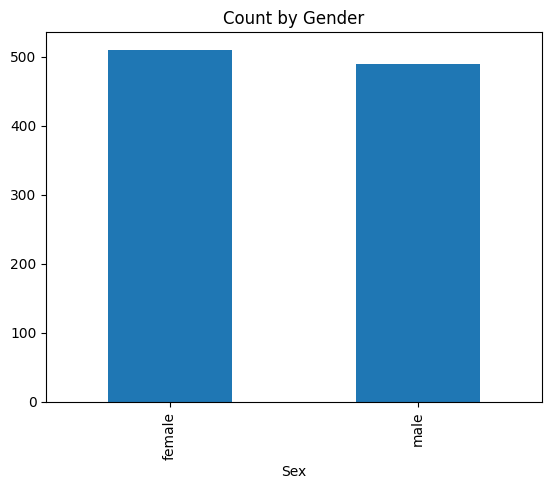

In [28]:
df["Sex"].value_counts().plot(kind="bar", title="Count by Gender")

<Axes: title={'center': 'Embarked Port Distribution'}, ylabel='count'>

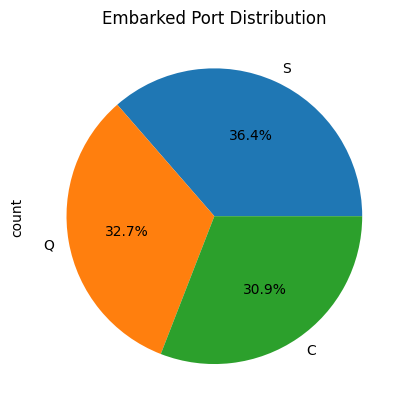

In [29]:
df["Embarked"].value_counts().plot(kind="pie", autopct="%1.1f%%", title="Embarked Port Distribution")

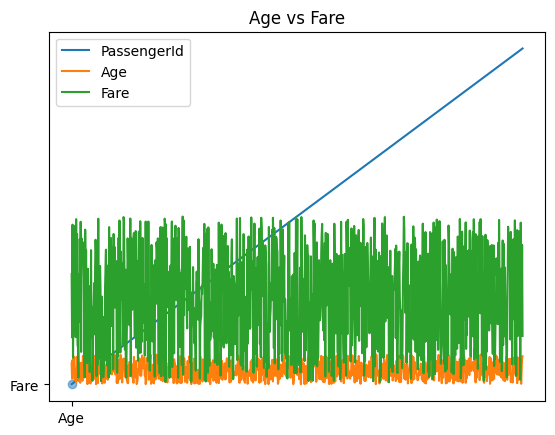

In [30]:
df.plot(title="Age vs Fare").scatter(x="Age", y="Fare", alpha=0.5)

## Task 4: Merging Employee Data

In [31]:
employee_info = pd.read_csv("./employee_info.csv")
employee_salary = pd.read_csv("./employee_salary.csv")

merged_employees = pd.merge(employee_info, employee_salary, on="EmployeeID")
merged_employees.head()

,EmployeeID,Name,Salary
0,1,Joshua,76976
1,2,Kelly,110578
2,3,Michael,75095
3,4,Lisa,44270
4,5,Alexander,60908


## Task 5: Student Data Merging

In [32]:
student_grades = pd.read_csv("./student_grades.csv")
student_activities = pd.read_csv("./student_activities.csv")

merged_students = pd.merge(student_grades, student_activities, on="StudentID")
merged_students.head()

,StudentID,Grade,Activity
0,1,C,Dance
1,2,C,Music
2,3,D,Football
3,4,F,Music
4,5,D,Art


## Task 6: Customers and Orders

In [33]:
customers = pd.read_csv("./customers.csv")
orders = pd.read_csv("./orders.csv")

merged_orders = pd.merge(customers, orders, on="CustomerID")
merged_orders.head()

,CustomerID,CustomerName,OrderID,OrderDate,TotalOrderValue
0,101,Derek Olsen,28,2023-01-28,4432
1,101,Derek Olsen,299,2023-10-26,2326
2,102,Kathy Sanchez,239,2023-08-27,2885
3,102,Kathy Sanchez,596,2024-08-18,4581
4,104,Frank Pierce,839,2025-04-18,2133


## Task 7: Total Order Value per Customer

In [34]:
total_order_value = merged_orders.groupby("CustomerName")["TotalOrderValue"].sum().reset_index()
total_order_value.sort_values(by="TotalOrderValue", ascending=False).head()

,CustomerName,TotalOrderValue
28,Andrea George,15418
373,Matthew Chapman,14460
193,Gina Dalton,13435
486,Shannon Smith,13087
480,Scott Barnes,13041


## Task 8: Products, Sales, and Returns

In [35]:
products = pd.read_csv("./products.csv")
sales = pd.read_csv("./sales.csv")
returns = pd.read_csv("./returns.csv")

# Merge products with sales
merged_sales = pd.merge(sales, products, on="ProductID")
merged_sales.head()

,SaleID,ProductID,Quantity,Amount,ProductName
0,1,2,1,941,Few
1,2,84,3,4234,Message
2,3,15,5,757,Agency
3,4,4,7,2447,Each
4,5,86,3,4532,Grow


In [36]:
# Merge products with returns
merged_returns = pd.merge(returns, products, on="ProductID")
merged_returns.head()

,ReturnID,ProductID,Quantity,Amount,ProductName
0,1,12,3,695,Fill
1,2,99,2,1528,Specific
2,3,40,3,75,Dream
3,4,54,2,1563,Six
4,5,2,4,1081,Few
